In [1]:
# filter some warning messages
import warnings 
warnings.filterwarnings("ignore") 

#libraries
import datetime as dt
import xarray as xr
import fsspec
import s3fs
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
# make datasets display nicely
xr.set_options(display_style="html")  

#magic fncts #put static images of your plot embedded in the notebook
%matplotlib inline  
plt.rcParams['figure.figsize'] = 12, 6
%config InlineBackend.figure_format = 'retina'

In [2]:
%%time 

file_location = 's3://mur-sst/zarr' # from amazon cloud

ikey = fsspec.get_mapper(file_location, anon=True)

ds_sst = xr.open_zarr(ikey,consolidated=True)

ds_sst

Wall time: 20min 5s


,Array,Chunk
Bytes,16.70 TB,257.72 MB
Shape,"(6443, 17999, 36000)","(6443, 100, 100)"
Count,64801 Tasks,64800 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,16.70 TB,257.72 MB
Shape,"(6443, 17999, 36000)","(6443, 100, 100)"
Count,64801 Tasks,64800 Chunks
Type,float32,numpy.ndarray
,Array,Chunk


Wall time: 1min 32s


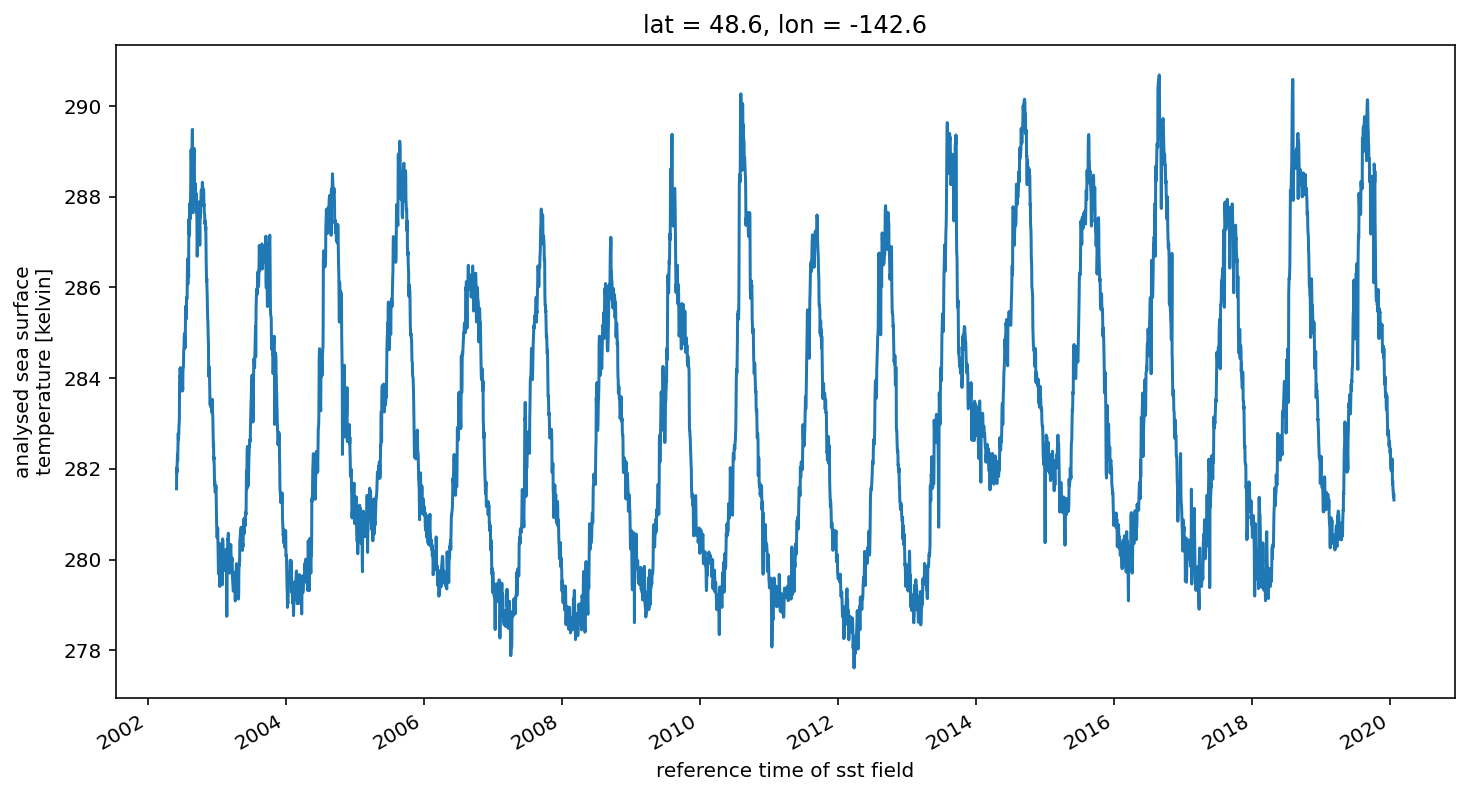

In [3]:
%%time

sst_timeseries_theblob = ds_sst['analysed_sst'].sel(time = slice('2002-06-01','2020-01-20'),
                                            lat  = 48.6,
                                            lon  = -142.6
                                           ).load()

sst_timeseries_theblob.plot()

In [4]:
# Load required modules to calculate mhw
import numpy as np
from datetime import date
from matplotlib import pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
# Load marineHeatWaves definition module
import marineHeatWaves as mhw

In [6]:
whos

Variable                 Type         Data/Info
-----------------------------------------------
date                     type         <class 'datetime.date'>
ds_sst                   Dataset      <xarray.Dataset>\nDimensi<...>st_longitude:      -180.0
dt                       module       <module 'datetime' from '<...>onda3\\lib\\datetime.py'>
file_location            str          s3://mur-sst/zarr
fsspec                   module       <module 'fsspec' from 'C:<...>es\\fsspec\\__init__.py'>
ikey                     FSMap        <fsspec.mapping.FSMap obj<...>ct at 0x0000023434FA38E0>
mhw                      module       <module 'marineHeatWaves'<...>pt1\\marineHeatWaves.py'>
pd                       module       <module 'pandas' from 'C:<...>es\\pandas\\__init__.py'>
s3fs                     module       <module 's3fs' from 'C:\\<...>ages\\s3fs\\__init__.py'>
sst_timeseries_theblob   DataArray    <xarray.DataArray 'analys<...>   valid_min:      -32767
warnings                 module   

In [51]:
#change to celcius
sst_blob=sst_timeseries_theblob-273.15
print(sst_blob)


<xarray.DataArray 'analysed_sst' (time: 6443)>
array([8.411011, 8.872986, 8.769012, ..., 8.225006, 8.299988, 8.164001],
      dtype=float32)
Coordinates:
    lat      float32 48.6
    lon      float32 -142.6
  * time     (time) datetime64[ns] 2002-06-01T09:00:00 ... 2020-01-20T09:00:00


In [52]:
t2 = sst_blob.time.values
t1 = pd.DatetimeIndex(t2)
t = np.arange(date(t1[0].year,t1[0].month,t1[0].day).toordinal(),date(t1[-1].year,t1[-1].month,t1[-1].day).toordinal()+1)

In [53]:
mhws, clim = mhw.detect(t, sst_blob.values)
print(mhws)

{'time_start': [731132, 733985, 733997, 735077, 735091, 735123, 735224, 735369, 735427, 735477, 735604, 735628, 735651, 735745, 735777, 736195, 736218, 736895, 736973, 737006, 737180, 737226, 737243, 737259, 737277, 737300, 737339, 737377], 'time_end': [731169, 733990, 734002, 735083, 735096, 735128, 735362, 735409, 735431, 735520, 735617, 735639, 735673, 735753, 735797, 736206, 736234, 736910, 736994, 737040, 737192, 737233, 737248, 737263, 737293, 737308, 737343, 737394], 'time_peak': [731157, 733988, 733997, 735080, 735092, 735126, 735252, 735391, 735428, 735490, 735614, 735637, 735666, 735749, 735787, 736202, 736222, 736908, 736981, 737008, 737184, 737232, 737243, 737259, 737288, 737304, 737343, 737391], 'date_start': [datetime.date(2002, 10, 9), datetime.date(2010, 8, 1), datetime.date(2010, 8, 13), datetime.date(2013, 7, 28), datetime.date(2013, 8, 11), datetime.date(2013, 9, 12), datetime.date(2013, 12, 22), datetime.date(2014, 5, 16), datetime.date(2014, 7, 13), datetime.date(2

In [55]:
def event_line_cat(ev, sst, t, mhws, clim):
    
    '''
    Function for plot categories MHW
    Bruna Alves, 2020
    Ocean Hack Week MHW project
    '''

    '''
    inputs:
    'ev'    event number, you must select event from mhws (obtained from mhw.detect)
    'sst'   sea surface temperature variable (1D)
    'mhws'  output from mhw.detect
    'clim'  output from mhw.detect 
    '''
    
    from matplotlib import colors as mcolors
    colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
    
    dates = [date.fromordinal(tt.astype(int)) for tt in t]
    diff = clim['thresh']-clim['seas']     
    threshold2x = clim['thresh']+diff
    threshold3x = threshold2x+diff
    threshold4x = threshold3x+diff
    
    if ev>2:
        evi=ev-2
    else:
        evi=0
        
    plt.figure(figsize=(16,8))        
    for ev0 in np.arange(evi, ev+2, 1):
        t1 = np.where(t==mhws['time_start'][ev0])[0][0]
        t2 = np.where(t==mhws['time_end'][ev0])[0][0]
    
        #Plot fill
        #Moderate
        plt.fill_between(dates[t1:t2+1], sst[t1:t2+1], clim['thresh'][t1:t2+1], color=colors['gold'])
    
        #Strong
        plt.fill_between(dates[t1:t2+1], sst[t1:t2+1], threshold2x[t1:t2+1],
                  where = (sst[t1:t2+1] > clim['thresh'][t1:t2+1]) & (sst [t1:t2+1] > threshold2x[t1:t2+1]), 
                  color=colors['coral'])
    
        #Severe
        plt.fill_between(dates[t1:t2+1], sst[t1:t2+1], threshold3x[t1:t2+1], 
                  where = (sst[t1:t2+1] > threshold2x[t1:t2+1]) & (sst [t1:t2+1] > threshold3x[t1:t2+1]), 
                  color=colors['crimson'])
    
        #Extreme
        plt.fill_between(dates[t1:t2+1], sst[t1:t2+1], threshold4x[t1:t2+1], 
                     where = (sst[t1:t2+1] > threshold3x[t1:t2+1]) & (sst [t1:t2+1] > threshold4x[t1:t2+1]), 
                     color=colors['darkred'])

    
        # Plot SST, Thresh, 2x, 3x, 4x
    plt.plot(dates, sst, 'k-', linewidth=2,label='SST')
    plt.plot(dates, clim['seas'], '-', linewidth=2, color=colors['steelblue'],label = 'Climatology')
    plt.plot(dates, clim['thresh'], 'g-', linewidth=2, label = 'Threshold')
    plt.plot(dates,threshold2x, 'g--',linewidth=2,label = '2x Threshold')
    plt.plot(dates,threshold3x, 'g-.',linewidth=2, label = '3x Threshold')
    plt.plot(dates,threshold4x, 'g:',linewidth=2, label = '4x Threshold')
    plt.title('MHW Categories',fontdict={'fontsize': 14, 'fontweight': 'bold'})       
    plt.xlim(datetime.date.fromordinal(mhws['time_start'][ev]-150), datetime.date.fromordinal(mhws['time_end'][ev]+150))
    plt.legend(prop={"size":12})
    plt.xlabel('Time',fontdict={'fontsize': 14})
    plt.ylabel('SST',fontdict={'fontsize': 14})


In [56]:
mhws['n_events']
mhws['intensity_max'][0:10]


[3.1712231789865797,
 3.2603174947923232,
 2.5683453159947547,
 2.923811389553933,
 1.924636656238187,
 1.9545660941831535,
 3.1951603120373147,
 2.795724191973287,
 2.683255318672426,
 2.6980127826813742]

In [69]:
ev = np.argmax(mhws['intensity_max']) # Find largest event
print ('Maximum intensity:', mhws['intensity_max'][ev], 'deg. C')
print ('Average intensity:', mhws['intensity_mean'][ev], 'deg. C')
print ('Cumulative intensity:', mhws['intensity_cumulative'][ev], 'deg. C-days')
print ('Duration:', mhws['duration'][ev], 'days')
print ('Start date:', mhws['date_start'][ev].strftime("%d %B %Y"))
print ('End date:', mhws['date_end'][ev].strftime("%d %B %Y"))
print (ev)
print(mhws['category'])

Maximum intensity: 3.716308347640499 deg. C
Average intensity: 2.693397560427266 deg. C
Cumulative intensity: 43.094360966836255 deg. C-days
Duration: 16 days
Start date: 20 July 2018
End date: 04 August 2018
17
['Moderate', 'Moderate', 'Moderate', 'Moderate', 'Moderate', 'Moderate', 'Moderate', 'Moderate', 'Moderate', 'Moderate', 'Moderate', 'Moderate', 'Moderate', 'Moderate', 'Moderate', 'Moderate', 'Moderate', 'Strong', 'Moderate', 'Moderate', 'Moderate', 'Moderate', 'Moderate', 'Moderate', 'Moderate', 'Moderate', 'Moderate', 'Moderate']


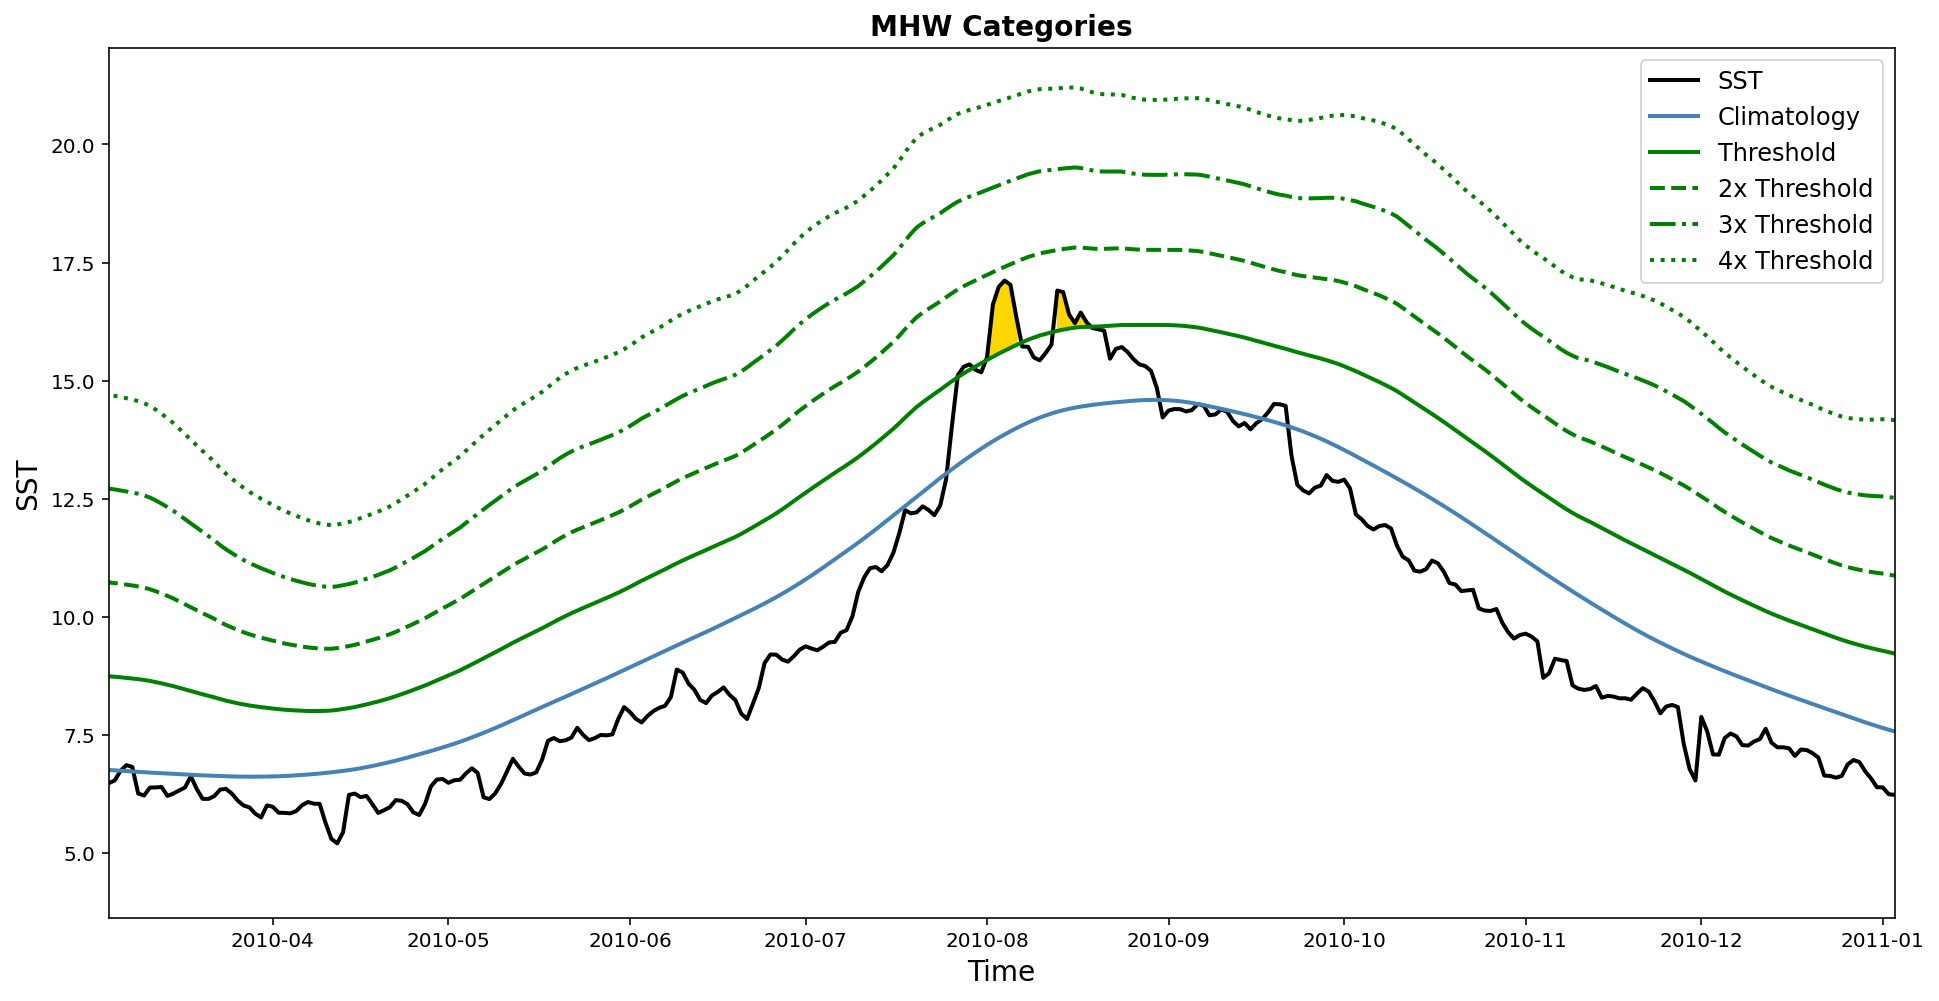

In [63]:
event_line_cat(1,sst_blob,t, mhws,clim)